In [1]:
# utility
import sys
sys.path.append("..")

import utility

# imports
import numpy as np

# modelling
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from scipy.ndimage import sobel
from sklearn.utils import shuffle

# Tree Visualization
import matplotlib.pyplot as plt

In [2]:
data, labels, _ = utility.load_data()

In [3]:
anom, anom_labes = utility.generate_letter_anomalies(num_anomalies=100, font_path="C:/Windows/Fonts/arial.ttf")

anom = anom.astype('float32') / 255.0

anom = anom.reshape(-1, 28 * 28)

Dataset split: 70000 train rows
Dataset split: 70000 test rows


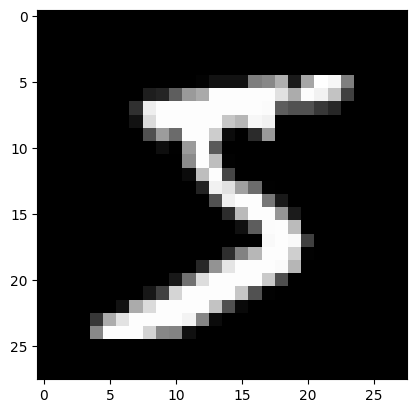

In [4]:
print(f"Dataset split: {len(data)} train rows")
print(f"Dataset split: {len(labels)} test rows")

point = data[0].reshape(28, 28)

plt.imshow(point, cmap='gray')
plt.show()

In [5]:
train_data, train_labels, test_data, test_labels = utility.preprocess_data(data, labels, False)

In [6]:
with open('../shuffled_data.npy', 'rb') as f:
    test_data = np.load(f)

with open('../shuffled_labels.npy', 'rb') as f:
    test_labels = np.load(f)

In [7]:
# Define parameter grid
param_grid = {
    'n_neighbors': [5, 10, 15],
    'algorithm': ['auto', 'brute', 'ball_tree'],
    'leaf_size': [10, 30, 50],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'contamination': [0.0004]
}

In [8]:
# Store results in a list
results = []

for params in ParameterGrid(param_grid):
    print(f"Start iteration for {params}")
    model = LocalOutlierFactor(**params, novelty=True)
    model.fit(train_data)
    scores_anom = model.decision_function(test_data)
    
    # Calculate AUC score using roc_auc_score
    auc_score = roc_auc_score(test_labels, scores_anom)
    results.append({'params': params, 'auc_score': auc_score})
    

# Sort results from best to worst
results = sorted(results, key=lambda x: x['auc_score'], reverse=True)

# Print results
for i, result in enumerate(results, start=1):
    print(f"Rank {i}: AUC Score {result['auc_score']:.4f} - Parameters: {result['params']}")

Start iteration for {'algorithm': 'auto', 'contamination': 0.0004, 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 5}
Start iteration for {'algorithm': 'auto', 'contamination': 0.0004, 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 10}
Start iteration for {'algorithm': 'auto', 'contamination': 0.0004, 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 15}
Start iteration for {'algorithm': 'auto', 'contamination': 0.0004, 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 5}
Start iteration for {'algorithm': 'auto', 'contamination': 0.0004, 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 10}
Start iteration for {'algorithm': 'auto', 'contamination': 0.0004, 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 15}
Start iteration for {'algorithm': 'auto', 'contamination': 0.0004, 'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 5}
Start iteration for {'algorithm': 'auto', 'contamination': 0.0004, 'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors':

In [9]:
# parameters
# Rank 1: AUC Score 0.9959 - Parameters: {'algorithm': 'auto', 'contamination': 0.0004, 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 5}
# Rank 2: AUC Score 0.9959 - Parameters: {'algorithm': 'auto', 'contamination': 0.0004, 'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 5}
# Rank 3: AUC Score 0.9959 - Parameters: {'algorithm': 'auto', 'contamination': 0.0004, 'leaf_size': 30, 'metric': 'euclidean', 'n_neighbors': 5}
# Rank 4: AUC Score 0.9959 - Parameters: {'algorithm': 'auto', 'contamination': 0.0004, 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 5}
# Rank 5: AUC Score 0.9959 - Parameters: {'algorithm': 'auto', 'contamination': 0.0004, 'leaf_size': 50, 'metric': 'euclidean', 'n_neighbors': 5}
# Rank 6: AUC Score 0.9959 - Parameters: {'algorithm': 'auto', 'contamination': 0.0004, 'leaf_size': 50, 'metric': 'minkowski', 'n_neighbors': 5}
# Rank 7: AUC Score 0.9959 - Parameters: {'algorithm': 'brute', 'contamination': 0.0004, 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 5}
# Rank 8: AUC Score 0.9959 - Parameters: {'algorithm': 'brute', 'contamination': 0.0004, 'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 5}
# Rank 9: AUC Score 0.9959 - Parameters: {'algorithm': 'brute', 'contamination': 0.0004, 'leaf_size': 30, 'metric': 'euclidean', 'n_neighbors': 5}
# Rank 10: AUC Score 0.9959 - Parameters: {'algorithm': 'brute', 'contamination': 0.0004, 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 5}
# Rank 11: AUC Score 0.9959 - Parameters: {'algorithm': 'brute', 'contamination': 0.0004, 'leaf_size': 50, 'metric': 'euclidean', 'n_neighbors': 5}
# Rank 12: AUC Score 0.9959 - Parameters: {'algorithm': 'brute', 'contamination': 0.0004, 'leaf_size': 50, 'metric': 'minkowski', 'n_neighbors': 5}
# Rank 13: AUC Score 0.9959 - Parameters: {'algorithm': 'ball_tree', 'contamination': 0.0004, 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 5}
# Rank 14: AUC Score 0.9959 - Parameters: {'algorithm': 'ball_tree', 'contamination': 0.0004, 'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 5}
# Rank 15: AUC Score 0.9959 - Parameters: {'algorithm': 'ball_tree', 'contamination': 0.0004, 'leaf_size': 30, 'metric': 'euclidean', 'n_neighbors': 5}
# Rank 16: AUC Score 0.9959 - Parameters: {'algorithm': 'ball_tree', 'contamination': 0.0004, 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 5}

In [10]:
# Extract the best parameters
best_params = results[0]['params']

# Include contamination in the best_params
best_params['contamination'] = 0.0004

model = LocalOutlierFactor(novelty=True, **best_params)
model.fit(train_data, train_labels)

LocalOutlierFactor(contamination=0.00036, leaf_size=10, metric='euclidean',
                   n_neighbors=5, novelty=True)

In [11]:
# Get anomaly scores for training and test data
scores_train = model.decision_function(train_data)
scores_test = model.decision_function(test_data)
scores_anom = model.decision_function(anom)

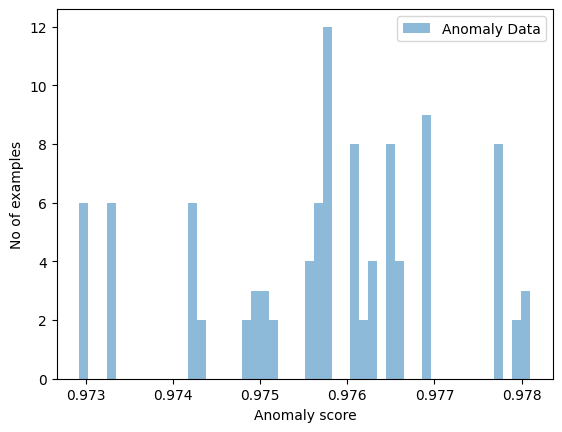

In [12]:
# Plot histograms of anomaly scores for training and test data
plt.hist(scores_anom, bins=50, alpha=0.5, label='Anomaly Data')
plt.xlabel("Anomaly score")
plt.ylabel("No of examples")
plt.legend()
plt.show()

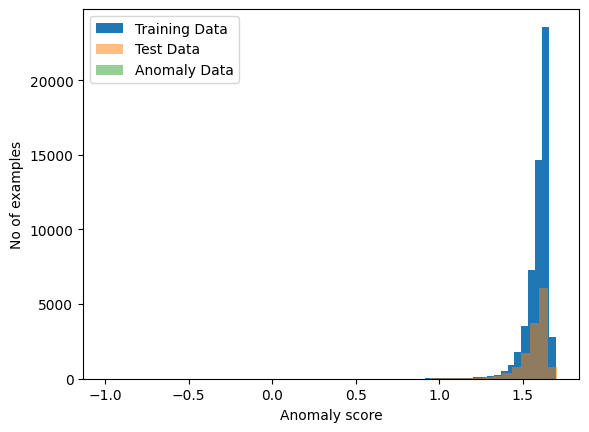

In [13]:
# Plot histograms of anomaly scores for training and test data
plt.hist(scores_train, bins=50, label='Training Data')
plt.hist(scores_test, bins=50, alpha=0.5, label='Test Data')
plt.hist(scores_anom, bins=50, alpha=0.5, label='Anomaly Data')
plt.xlabel("Anomaly score")
plt.ylabel("No of examples")
plt.legend()
plt.show()

In [14]:
# predict
preds = model.predict(test_data)

# Convert to boolean values
preds = [pred == 1 for pred in preds]

# Convert to numpy array
preds = np.array(preds)

In [15]:
# anomaly scores
anomaly_scores = model.decision_function(test_data)

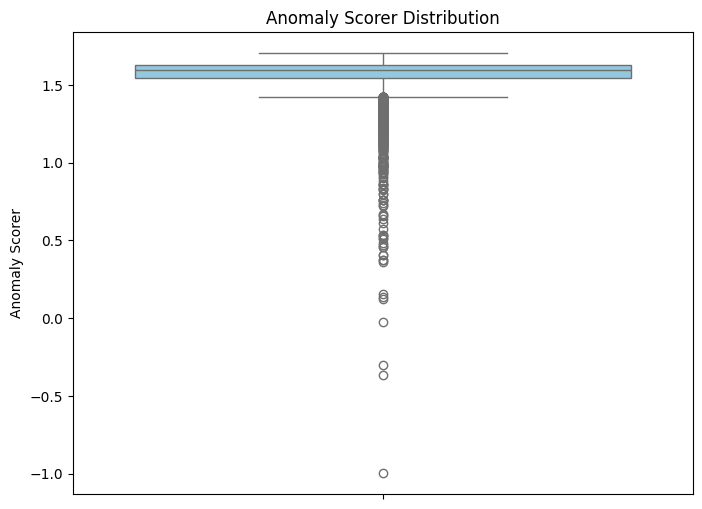

In [16]:
utility.boxplot_plot("Anomaly Scorer", anomaly_scores)

C:\Users\zippe\AppData\Local\Temp\ipykernel_21480\1733794093.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(range(len(anomaly_scores)), anomaly_scores, c=['blue' if e > threshold else 'red' for e in anomaly_scores], cmap='coolwarm', marker='o', edgecolors='k')


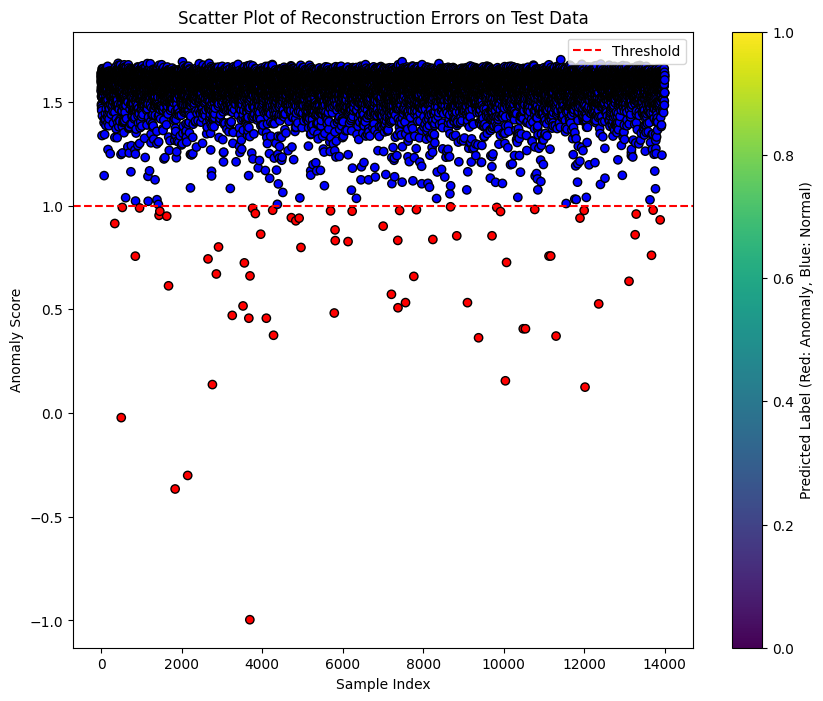

In [24]:
# Set a threshold for classifying anomalies
threshold = 1 # Adjust this threshold as needed

# Create a binary array indicating anomalies
anomaly_indicator = np.where(anomaly_scores > threshold, 1, 0)

# Scatter plot with anomalies and normal instances based on anomaly prediction and threshold
plt.figure(figsize=(10, 8))
scatter = plt.scatter(range(len(anomaly_scores)), anomaly_scores, c=['blue' if e > threshold else 'red' for e in anomaly_scores], cmap='coolwarm', marker='o', edgecolors='k')
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')
plt.title('Scatter Plot of Reconstruction Errors on Test Data')
plt.xlabel('Sample Index')
plt.ylabel('Anomaly Score')
plt.legend()
plt.colorbar(scatter, label='Predicted Label (Red: Anomaly, Blue: Normal)')
plt.show()

In [25]:
# Predict anomalies based on the custom threshold
preds = (anomaly_scores > threshold).astype(int)

# Convert labels from -1/1 to True/False
preds = preds == 1

In [26]:
a, p, r, report, cm = utility.get_metrics(preds, test_labels)

In [27]:
utility.print_stats(a, p, r, report, cm)

Accuracy = 0.9952873973580864
Precision = 1.0
Recall = 0.9952857142857143
Report
               precision    recall  f1-score   support

     anomaly       0.07      1.00      0.13         5
      normal       1.00      1.00      1.00     14000

    accuracy                           1.00     14005
   macro avg       0.54      1.00      0.56     14005
weighted avg       1.00      1.00      1.00     14005

Confusion Matrix
[[    5     0]
 [   66 13934]]


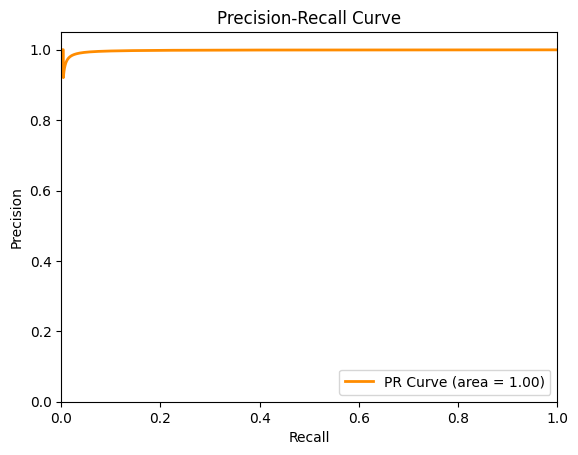

In [28]:
utility.pr_auc_plot(anomaly_scores, test_labels, True)

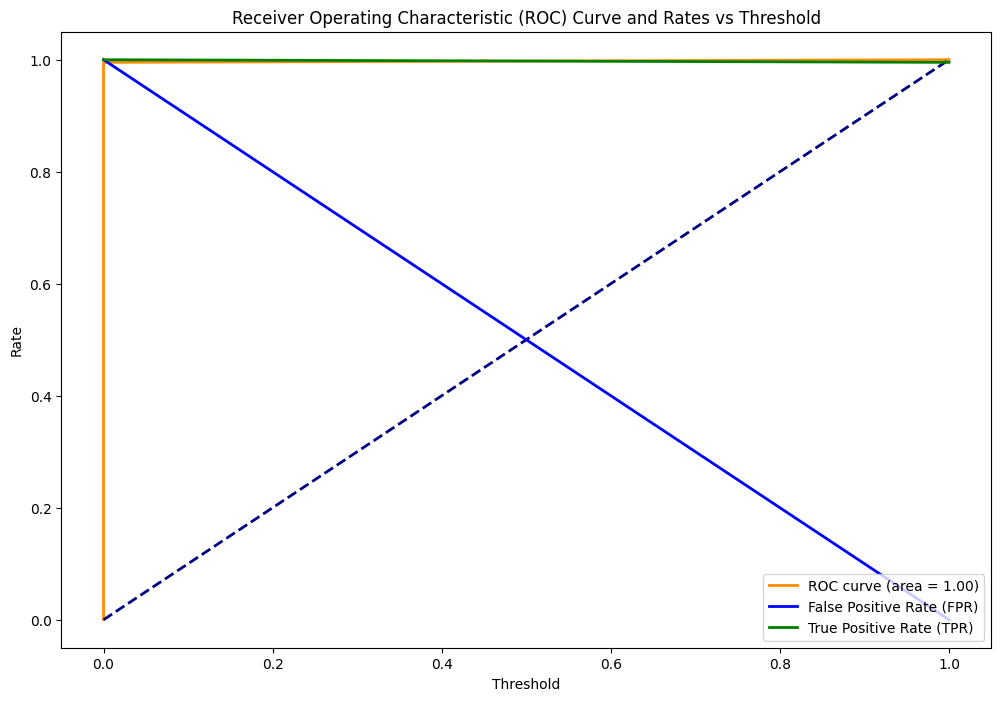

In [29]:
utility.roc_plot(preds, test_labels)

True Negatives: 5
False Positives: 0
False Negatives: 66
True Positives: 13934


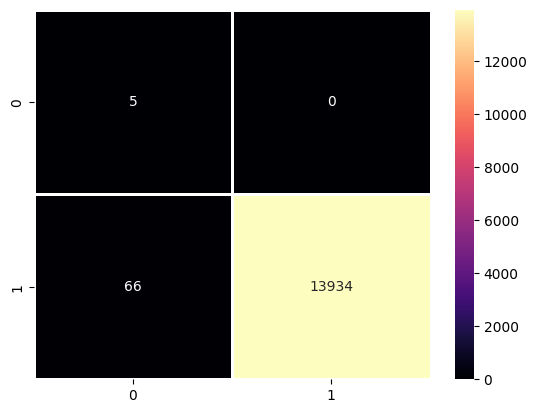

In [30]:
utility.create_heatmap(cm)